# Logistic Regression Model

## Importing the libraries

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


## Importing the dataset

In [2]:
# Importing the dataset
dataset = pd.read_csv('Data.csv')
dataset


,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
678,776715,3,1,1,1,3,2,1,1,1,2
679,841769,2,1,1,1,2,1,1,1,1,2
680,888820,5,10,10,3,7,3,8,10,2,4
681,897471,4,8,6,4,3,4,10,6,1,4


In [3]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values


## Splitting the dataset into the Training set and Test set

In [4]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)


## Feature Scaling

In [5]:
X_original = X_train


In [6]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


## Original data vs Scaled data

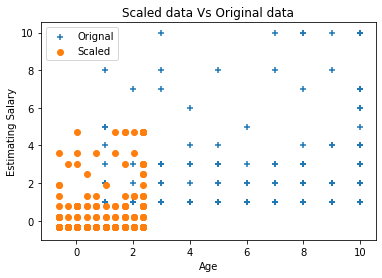

In [7]:
plt.scatter(X_original[:, -2], X_original[:, -1], marker='+')
plt.scatter(X_train[:, -2], X_train[:, -1])
plt.legend(['Orignal', 'Scaled'])
plt.title("Scaled data Vs Original data")
plt.show()


## Fitting Logistic Regression to the Training set


In [9]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)


/home/its-k/anaconda3/envs/Learning/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

## Predicting the Test set results


In [10]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)


## Making the Confusion Matrix


In [11]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)


[[100   2]
 [  2  67]]


In [12]:
# Finding the accuracy of model
(cm[0][0] + cm[1][1]) / sum(sum(cm))


0.9766081871345029

In [13]:
accuracy_score(y_test, y_pred)


0.9766081871345029